In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Principal Component Analysis
주성분 분석 : 데이터에 있는 **분산이 큰 방향**을 찾는 것  
일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다.  

##  차원축소
군집이나 분류에 영향을 끼치지 않으면서 업로드된 사진의 용량을 줄임    
데이터를 가장 잘 나타내는 일부 특성을 선택해 데이터 크기를 줄이고 지도학습 모델 성능을 향상시킬 수 있다   
데이터가 가진 속성 == 특성 > 10,000개의 픽셀은 10,000개의 특성 => 10,000 차원 - Dimension 

## PCA 클래스

In [2]:
fruits = np.load(os.path.join('data', os.listdir('data')[0]))
fruits.shape
fruits_2d = fruits.reshape(-1, 100 * 100)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) 

In [4]:
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
fruits_2d.shape

(300, 10000)

In [6]:
pca.components_.shape

(50, 10000)

In [7]:
def draw_fruits(arr, ratio = 1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10 # 행이 1개면 열 개수 == 샘플 개수 
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze = False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n개까지만 그림
                axes[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axes[i, j].axis('off')
    plt.show()

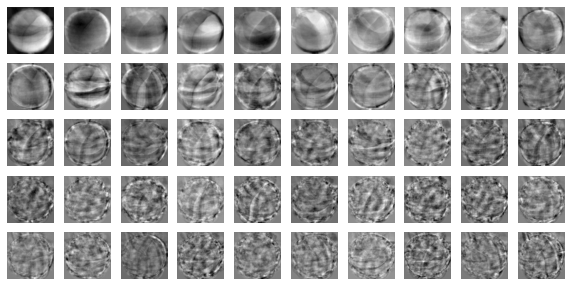

In [8]:
# 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [9]:
fruits_2d.shape

(300, 10000)

In [10]:
# 원본 데이터 차원을 50으로 줄임
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

## 원본 데이터 재구성

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

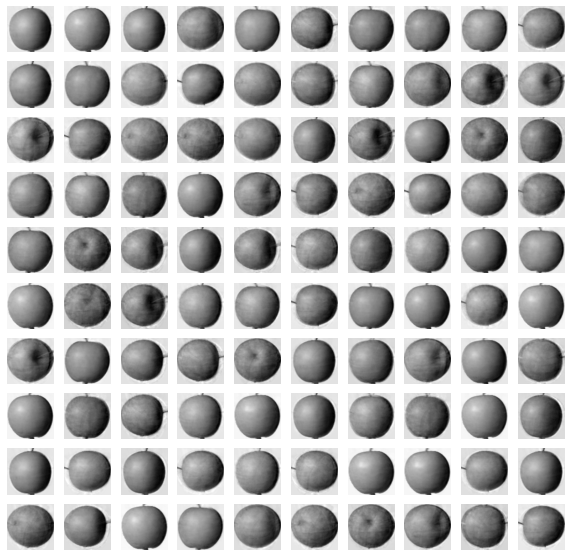

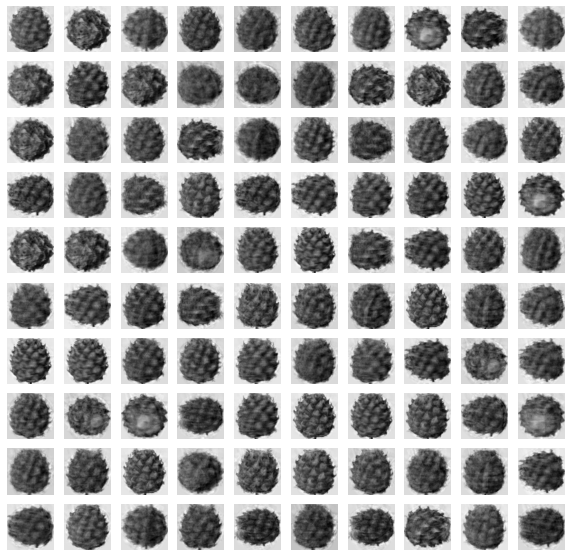

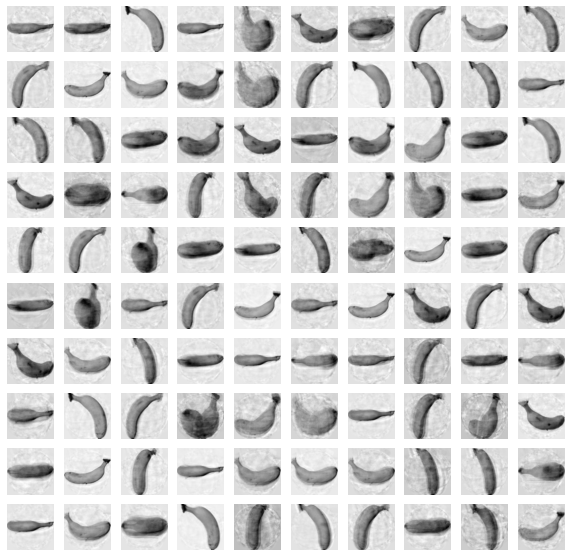

In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start : start + 100])
    print('\n')

## 설명된 분산 Explained Variance
분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [13]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486383, 0.00480347,
       0.00447835, 0.00437319, 0.00408023, 0.00389478, 0.00372439,
       0.00359285, 0.00331446, 0.00317855, 0.00304274, 0.00303748,
       0.00288832, 0.00275845, 0.00264988, 0.00255856, 0.00251161,
       0.00247181, 0.00239409, 0.00230649, 0.00221901, 0.00216127,
       0.00212984, 0.0019607 , 0.00190978, 0.00188137, 0.00184575,
       0.00182956, 0.00173422, 0.00166814, 0.00163491, 0.0016199 ])

In [14]:
np.sum(pca.explained_variance_ratio_)

0.9215109901051912

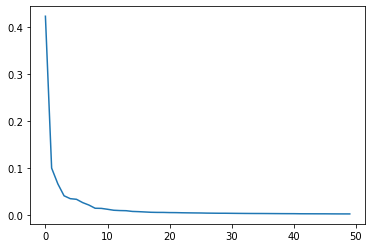

In [15]:
plt.plot(pca.explained_variance_ratio_)

처음 10개의 주성분이 대부분의 분산을 표현하고 있다. 그 다음부터의 분산은 비교적 작다.

# 다른 알고리즘과 함께 사용하기

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [17]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [18]:
from sklearn.model_selection import cross_validate

In [19]:
scores_origin = cross_validate(lr, fruits_2d, target)
scores_pca = cross_validate(lr, fruits_pca, target)

In [20]:
np.mean(scores_origin['test_score']), np.mean(scores_origin['fit_time'])

(0.9966666666666667, 0.4632075786590576)

In [21]:
np.mean(scores_pca['test_score']), np.mean(scores_pca['fit_time'])

(1.0, 0.021577119827270508)

지정된 비율에 도달할 때까지 자동으로 주성분-설명된 분산의 50%에 달하는 주성분을 찾도록 하는 방법

In [22]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [23]:
# 2개의 특성으로 원본데이터에 있는 분산의 50%를 표현할 수 있다
pca.n_components_

2

In [24]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [25]:
scores_pca = cross_validate(lr, fruits_pca, target)
np.mean(scores_pca['test_score']), np.mean(scores_pca['fit_time'])

/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

(0.9933333333333334, 0.03259725570678711)

In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [27]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [28]:
np.unique(km.labels_, return_counts = True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

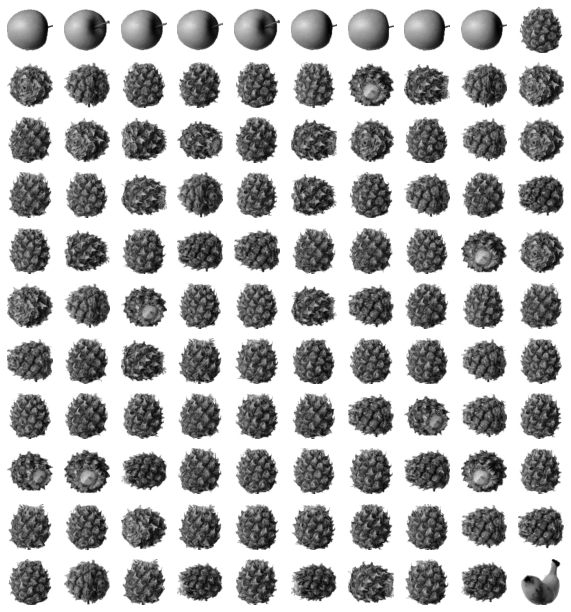

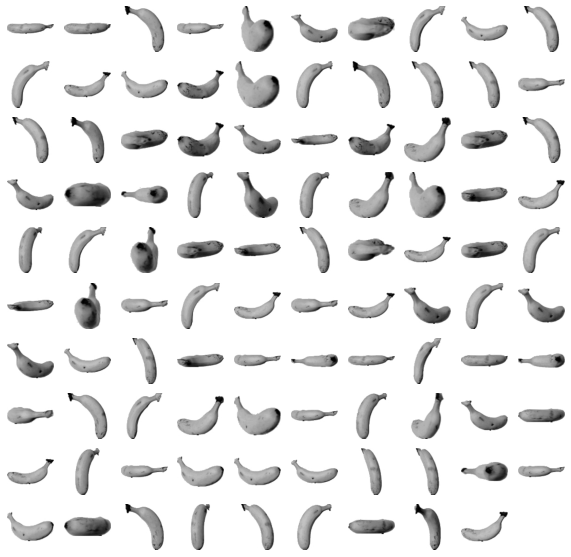

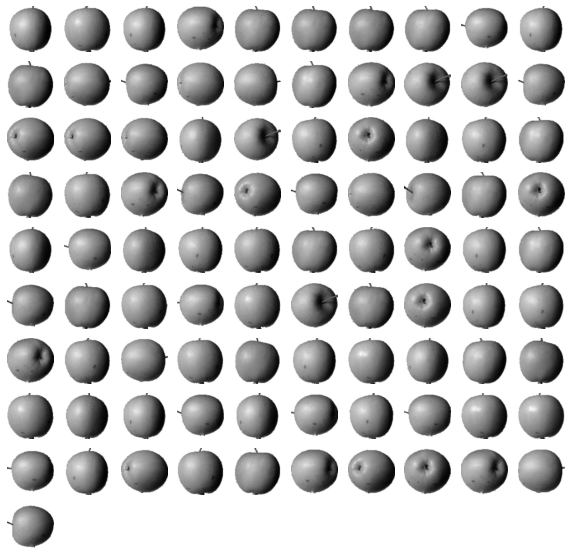

In [29]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])

    print('\n')

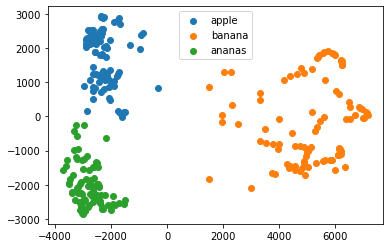

In [31]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
    
plt.legend(['apple', 'banana', 'ananas'])